## Import necessary Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import GridSearchCV

### Load and save model

In [2]:
import pickle
# Save model
def save_model(file_name, model):
    with open('model/'+file_name,'wb') as f:
        pickle.dump(model,f)
    f.close()

# Load model
def load_model(file_name):
    with open('model/'+file_name,'rb') as f:
        model = pickle.load(f)
    f.close()
    return model

In [2]:
import pickle
# Save model
def save_model(file_name, model):
    with open('/kaggle/working/'+file_name,'wb') as f:
        pickle.dump(model,f)
    f.close()

# Load model
def load_model(file_name):
    with open('/kaggle/working/'+file_name,'rb') as f:
        model = pickle.load(f)
    f.close()
    return model

### Balance data

In [3]:



# Get all data from first 20 file


data_path = 'datasets\CIC IoT 2023\\'
dfs = []
for i in range(0, 20):
    train_file = f'part-{i:05d}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
    print(train_file)
    dfs.append(pd.read_csv(data_path + train_file))

df = pd.concat(dfs, ignore_index=True)

part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
part-00017-363d1ba3-8ab5-4f96-b

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter


# Get all data from first 20 file


data_path = '/kaggle/input/cic-iot-2023/CIC IoT 2023/'
dfs = []
for i in range(0, 20):
    train_file = f'part-{i:05d}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
    print(train_file)
    dfs.append(pd.read_csv(data_path + train_file))

df = pd.concat(dfs, ignore_index=True)

In [4]:
# Display the original class distribution
print(df['label'].value_counts(ascending=True))

Uploading_Attack              126
Recon-PingSweep               197
Backdoor_Malware              359
XSS                           375
CommandInjection              497
SqlInjection                  550
BrowserHijacking              564
DictionaryBruteForce         1285
DDoS-SlowLoris               2401
DDoS-HTTP_Flood              2894
VulnerabilityScan            3804
DoS-HTTP_Flood               7304
Recon-PortScan               8242
Recon-OSScan                10028
Recon-HostDiscovery         13584
DNS_Spoofing                18269
DDoS-ACK_Fragmentation      28946
DDoS-UDP_Fragmentation      29312
MITM-ArpSpoofing            31175
DDoS-ICMP_Fragmentation     45709
Mirai-greip_flood           76356
Mirai-udpplain              90310
Mirai-greeth_flood          99640
BenignTraffic              111208
DoS-SYN_Flood              204010
DoS-TCP_Flood              270249
DoS-UDP_Flood              336005
DDoS-SynonymousIP_Flood    363311
DDoS-RSTFINFlood           408875
DDoS-SYN_Flood

In [5]:
# Convert attack label to attack category

c = {'DDoS-ICMP_Flood': 'DDos', 'DDoS-RSTFINFlood': 'DDos', 'DDoS-SYN_Flood': 'DDos', 'DDoS-SynonymousIP_Flood': 'DDos', 'DDoS-UDP_Flood': 'DDos', 'DDoS-PSHACK_Flood': 'DDos', 'DDoS-UDP_Fragmentation': 'DDos', 'DDoS-TCP_Flood': 'DDos', 'DDoS-ICMP_Fragmentation': 'DDos', 'DDoS-HTTP_Flood': 'DDos', 'DDoS-ACK_Fragmentation': 'DDos', 'DDoS-SlowLoris': 'DDos', 'DoS-UDP_Flood': 'Dos', 'DoS-TCP_Flood': 'Dos', 'DoS-SYN_Flood': 'Dos', 'DoS-HTTP_Flood': 'Dos', 'Recon-HostDiscovery': 'Recon', 'Recon-PortScan': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon', 'Uploading_Attack': 'Recon', 'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based', 'XSS': 'Web-based', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing', 'BrowserHijacking': 'Spoofing', 'DictionaryBruteForce': 'Bruteforce', 'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai', 'BenignTraffic': 'Benign'}


df['class'] = df['label'].map(c)

print(df['class'].value_counts(ascending=True))

df.drop("label" ,axis=1, inplace=True)

Bruteforce       1285
Web-based        1781
Recon           35981
Spoofing        50008
Benign         111208
Mirai          266306
Dos            817568
DDos          3439685
Name: class, dtype: int64


In [6]:
# undersampling the data 
# Separate features and category
X = df.drop('class', axis=1)
y = df['class']

# Resample the data using imblearn pipeline
pipeline = Pipeline([
    ('undersample', RandomUnderSampler()),  # Undersample majority class
    ('oversample', SMOTE())  # Oversample minority class
])

X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Create a new DataFrame with balanced data
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Display the balanced class distribution
print(balanced_df['class'].value_counts(ascending=True))

Benign        1285
Bruteforce    1285
DDos          1285
Dos           1285
Mirai         1285
Recon         1285
Spoofing      1285
Web-based     1285
Name: class, dtype: int64


### Data cleaning

In [7]:
# Drop high_corr_cols
high_corr_cols = ['Srate', 'fin_flag_number', 'rst_flag_number', 'LLC', 'Std', 'Number', 'Magnitue', 'Radius', 'Weight']
balanced_df.drop(high_corr_cols,axis=1, inplace=True)

In [8]:
sub_df = balanced_df   

# remove nan, inf, -inf value
sub_df = sub_df[~sub_df.isin([np.nan, np.inf, -np.inf]).any(1)] 

C:\Users\Gray\AppData\Local\Temp\ipykernel_2052\238644348.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  sub_df = sub_df[~sub_df.isin([np.nan, np.inf, -np.inf]).any(1)]


### Split train and test set

In [9]:
X = sub_df.iloc[:,:-1].to_numpy()
Y = sub_df.iloc[:,-1].to_numpy()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=random.randint(1,999))
print(X_train.shape,X_test.shape)

(8224, 37) (2056, 37)


### MISC

In [13]:
from sklearn import metrics
def print_report(clf, X_test, Y_test):
    clf_Y_pred = clf.predict(X_test)
    print(classification_report(Y_test, clf_Y_pred))
    ConfusionMatrixDisplay.from_predictions(Y_test, clf_Y_pred, normalize='true',values_format='.2f', xticks_rotation='vertical')

In [14]:

def print_accuracy(name, clf, X_test, Y_test):
    clf_Y_pred = clf.predict(X_test)
    print(f'{name} model accuracy:',metrics.accuracy_score(Y_test,clf_Y_pred))

### RF and SVM

Random forest model accuracy: 0.8842412451361867
              precision    recall  f1-score   support

      Benign       0.81      0.89      0.85       259
  Bruteforce       0.71      0.86      0.78       231
        DDos       1.00      1.00      1.00       250
         Dos       1.00      0.98      0.99       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.87      0.73      0.79       279
    Spoofing       0.91      0.81      0.86       269
   Web-based       0.80      0.82      0.81       255

    accuracy                           0.88      2056
   macro avg       0.89      0.89      0.88      2056
weighted avg       0.89      0.88      0.88      2056



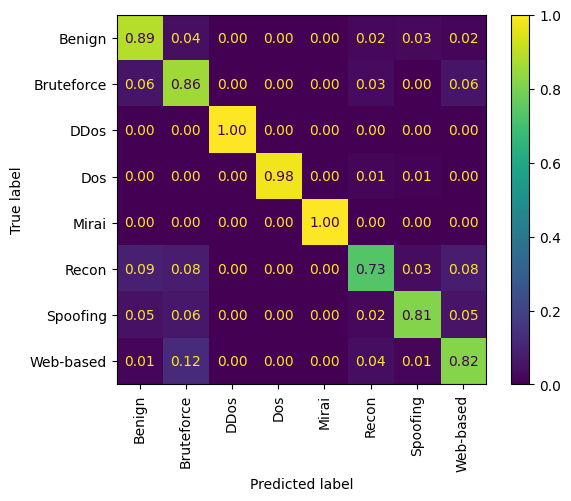

In [27]:
RF_clf = RandomForestClassifier(n_estimators=170 ,max_leaf_nodes=10000,n_jobs = -1)
RF_clf.fit(X_train, Y_train)
save_model('RF.pkl', RF_clf)
print_accuracy('Random forest',RF_clf,X_test,Y_test)
print_report(RF_clf,X_test,Y_test)

Random forest model accuracy: 0.8891050583657587
              precision    recall  f1-score   support

      Benign       0.82      0.89      0.86       259
  Bruteforce       0.74      0.84      0.79       231
        DDos       1.00      1.00      1.00       250
         Dos       1.00      0.97      0.99       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.87      0.75      0.80       279
    Spoofing       0.92      0.83      0.87       269
   Web-based       0.79      0.85      0.82       255

    accuracy                           0.89      2056
   macro avg       0.89      0.89      0.89      2056
weighted avg       0.89      0.89      0.89      2056



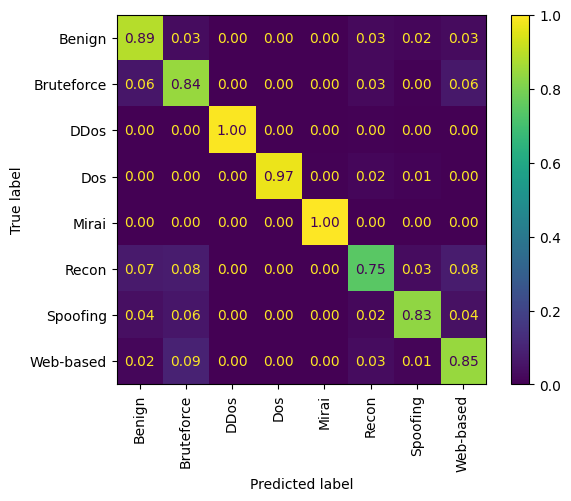

In [28]:
RF_clf = RandomForestClassifier(n_estimators=200 ,max_leaf_nodes=10000,n_jobs = -1)
RF_clf.fit(X_train, Y_train)
save_model('RF.pkl', RF_clf)
print_accuracy('Random forest',RF_clf,X_test,Y_test)
print_report(RF_clf,X_test,Y_test)

Random forest model accuracy: 0.8857003891050583
              precision    recall  f1-score   support

      Benign       0.83      0.90      0.86       259
  Bruteforce       0.71      0.85      0.77       231
        DDos       1.00      1.00      1.00       250
         Dos       1.00      0.96      0.98       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.88      0.74      0.80       279
    Spoofing       0.91      0.82      0.86       269
   Web-based       0.79      0.84      0.81       255

    accuracy                           0.89      2056
   macro avg       0.89      0.89      0.89      2056
weighted avg       0.89      0.89      0.89      2056



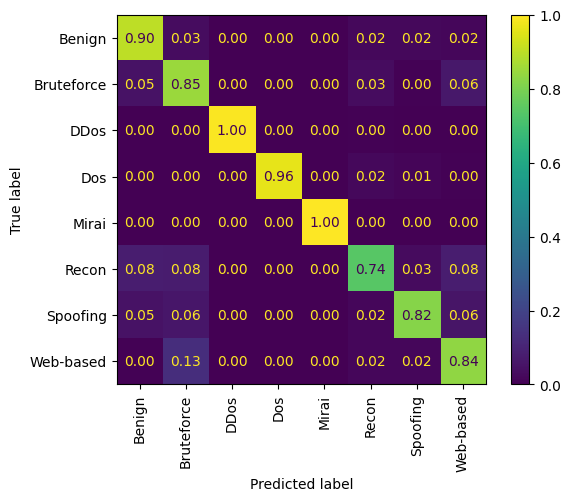

In [29]:
RF_clf = RandomForestClassifier(n_jobs = -1)
RF_clf.fit(X_train, Y_train)
save_model('RF.pkl', RF_clf)
print_accuracy('Random forest',RF_clf,X_test,Y_test)
print_report(RF_clf,X_test,Y_test)

SVM model accuracy: 0.6799610894941635
              precision    recall  f1-score   support

      Benign       0.63      0.64      0.63       259
  Bruteforce       0.47      0.54      0.50       231
        DDos       0.82      0.62      0.71       250
         Dos       0.69      0.89      0.78       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.79      0.48      0.59       279
    Spoofing       0.76      0.56      0.65       269
   Web-based       0.47      0.71      0.57       255

    accuracy                           0.68      2056
   macro avg       0.70      0.68      0.68      2056
weighted avg       0.71      0.68      0.68      2056



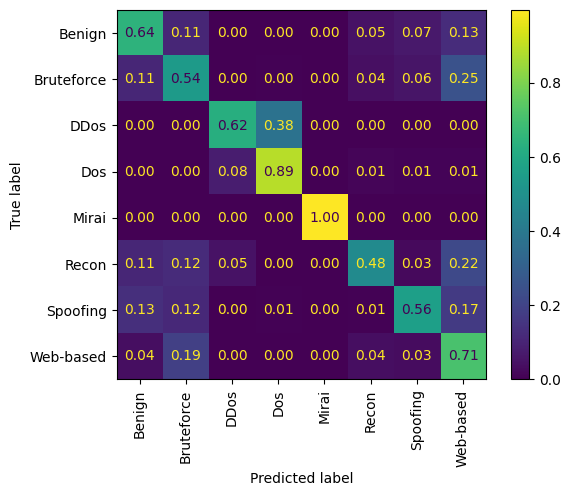

In [15]:
SVM_clf = make_pipeline(StandardScaler(),PCA(n_components=20), SVC(gamma='scale'))
SVM_clf.fit(X_train, Y_train)               
save_model('SVM.pkl', SVM_clf)
print_accuracy('SVM',SVM_clf,X_test,Y_test)
print_report(SVM_clf,X_test,Y_test)

SVM model accuracy: 0.6896887159533074
              precision    recall  f1-score   support

      Benign       0.62      0.66      0.64       259
  Bruteforce       0.49      0.53      0.51       231
        DDos       0.86      0.62      0.72       250
         Dos       0.69      0.90      0.78       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.82      0.52      0.64       279
    Spoofing       0.72      0.58      0.64       269
   Web-based       0.48      0.71      0.57       255

    accuracy                           0.69      2056
   macro avg       0.71      0.69      0.69      2056
weighted avg       0.72      0.69      0.69      2056



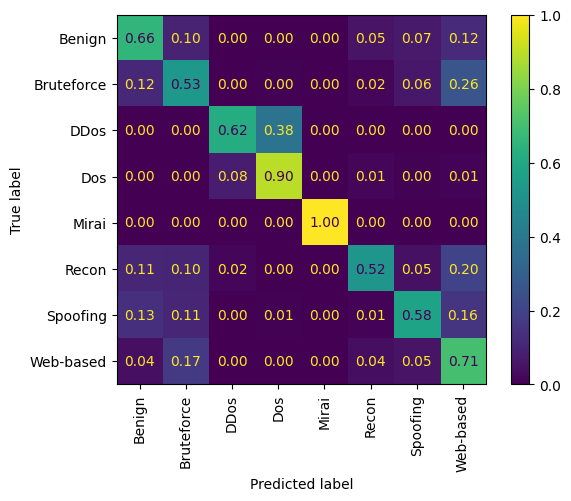

In [95]:
SVM_clf = make_pipeline(StandardScaler(),PCA(n_components=20), SVC(gamma='auto'))
SVM_clf.fit(X_train, Y_train)               
save_model('SVM.pkl', SVM_clf)
print_accuracy('SVM',SVM_clf,X_test,Y_test)
print_report(SVM_clf,X_test,Y_test)

SVM model accuracy: 0.7037937743190662
              precision    recall  f1-score   support

      Benign       0.65      0.68      0.66       259
  Bruteforce       0.47      0.57      0.51       231
        DDos       0.89      0.62      0.73       250
         Dos       0.70      0.90      0.79       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.76      0.59      0.67       279
    Spoofing       0.75      0.57      0.65       269
   Web-based       0.55      0.71      0.62       255

    accuracy                           0.70      2056
   macro avg       0.72      0.70      0.70      2056
weighted avg       0.73      0.70      0.71      2056



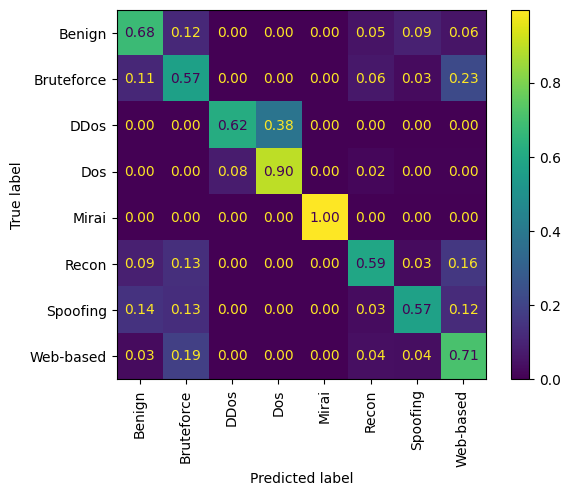

In [119]:
SVM_clf = make_pipeline(StandardScaler(),PCA(n_components=20), SVC(C=18,gamma='auto'))
SVM_clf.fit(X_train, Y_train)               
save_model('SVM.pkl', SVM_clf)
print_accuracy('SVM',SVM_clf,X_test,Y_test)
print_report(SVM_clf,X_test,Y_test)

### GRIDSEARCH / SHIT SEARCH / IDGAF


In [19]:

SVM_clf = SVC()
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'), 'C':[1,10]}                
SVM_clf = GridSearchCV(SVM_clf,parameters)
SVM_clf.fit(X_train,Y_train)
sorted(SVM_clf.cv_results_.keys())

### AdaBoost and Whateverthefuckthisis


In [74]:
from sklearn.tree import DecisionTreeClassifier

Adaboost model accuracy: 0.42023346303501946
              precision    recall  f1-score   support

      Benign       0.49      0.13      0.20       259
  Bruteforce       0.26      0.60      0.36       231
        DDos       0.42      0.37      0.39       250
         Dos       0.35      0.59      0.44       246
       Mirai       0.76      0.99      0.86       267
       Recon       0.33      0.20      0.25       279
    Spoofing       0.50      0.46      0.48       269
   Web-based       0.22      0.04      0.07       255

    accuracy                           0.42      2056
   macro avg       0.41      0.42      0.38      2056
weighted avg       0.42      0.42      0.38      2056



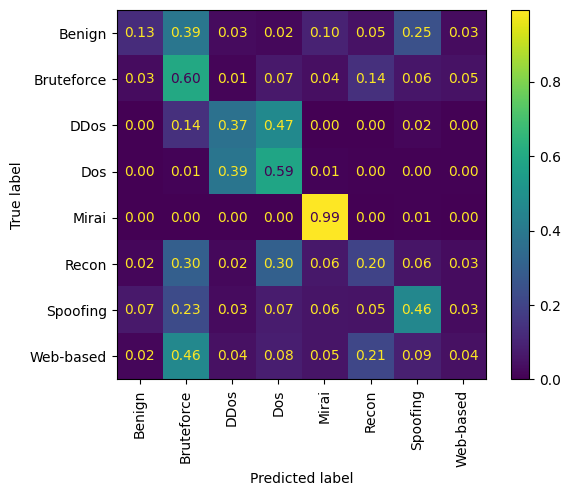

In [94]:
ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(n_estimators=100, learning_rate=2,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.5209143968871596
              precision    recall  f1-score   support

      Benign       0.57      0.47      0.51       259
  Bruteforce       0.35      0.56      0.43       231
        DDos       0.77      0.16      0.27       250
         Dos       0.46      0.97      0.63       246
       Mirai       0.89      1.00      0.94       267
       Recon       0.54      0.29      0.37       279
    Spoofing       0.46      0.41      0.44       269
   Web-based       0.38      0.33      0.35       255

    accuracy                           0.52      2056
   macro avg       0.55      0.52      0.49      2056
weighted avg       0.56      0.52      0.49      2056



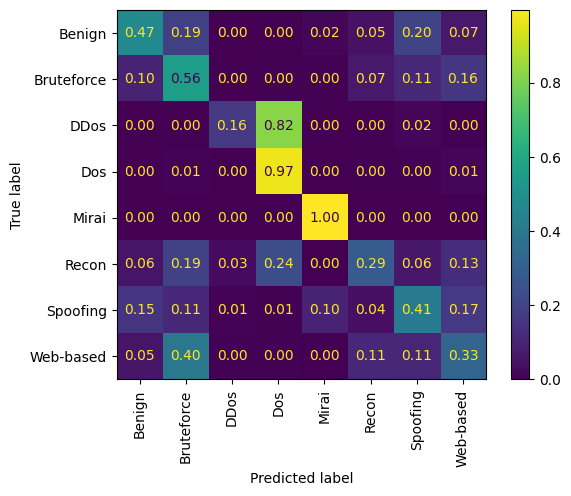

In [71]:

ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(n_estimators=3000, learning_rate=1.9,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.7164396887159533
              precision    recall  f1-score   support

      Benign       0.60      0.66      0.63       259
  Bruteforce       0.45      0.51      0.48       231
        DDos       0.90      0.88      0.89       250
         Dos       0.88      0.86      0.87       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.72      0.61      0.66       279
    Spoofing       0.68      0.62      0.65       269
   Web-based       0.54      0.58      0.56       255

    accuracy                           0.72      2056
   macro avg       0.72      0.72      0.72      2056
weighted avg       0.72      0.72      0.72      2056



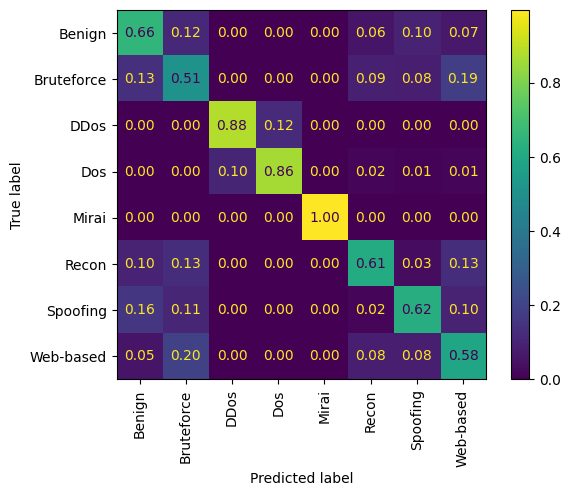

In [108]:

ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=13),n_estimators=300, learning_rate=1,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.7149805447470817
              precision    recall  f1-score   support

      Benign       0.60      0.63      0.62       259
  Bruteforce       0.45      0.53      0.48       231
        DDos       0.93      0.85      0.89       250
         Dos       0.86      0.90      0.88       246
       Mirai       1.00      0.99      1.00       267
       Recon       0.70      0.60      0.64       279
    Spoofing       0.68      0.62      0.65       269
   Web-based       0.55      0.60      0.57       255

    accuracy                           0.71      2056
   macro avg       0.72      0.71      0.72      2056
weighted avg       0.72      0.71      0.72      2056



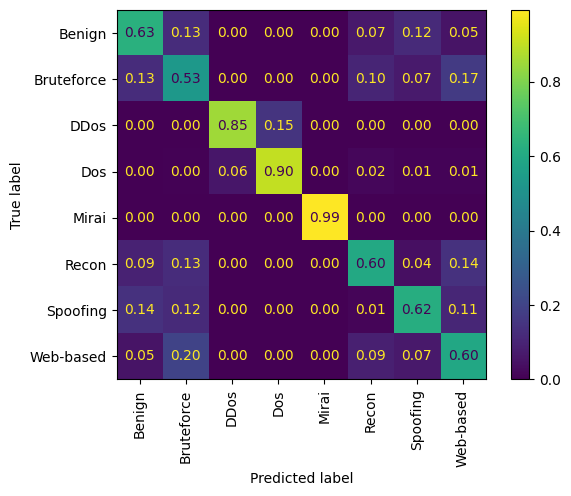

In [81]:

ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100, learning_rate=2,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

Adaboost model accuracy: 0.7174124513618677
              precision    recall  f1-score   support

      Benign       0.60      0.63      0.61       259
  Bruteforce       0.46      0.50      0.48       231
        DDos       0.90      0.88      0.89       250
         Dos       0.87      0.87      0.87       246
       Mirai       1.00      1.00      1.00       267
       Recon       0.72      0.62      0.66       279
    Spoofing       0.65      0.62      0.64       269
   Web-based       0.56      0.62      0.59       255

    accuracy                           0.72      2056
   macro avg       0.72      0.72      0.72      2056
weighted avg       0.72      0.72      0.72      2056



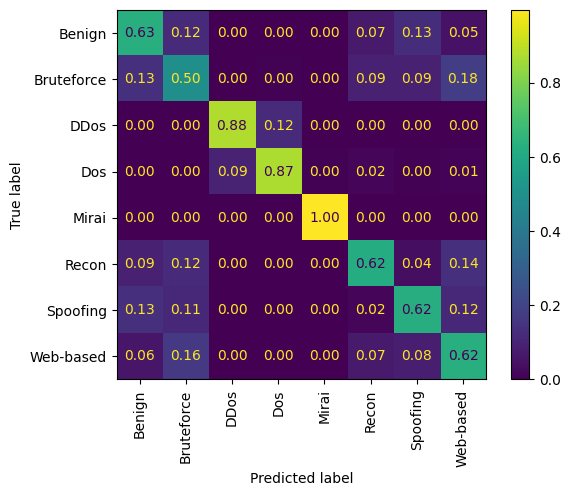

In [109]:

ADAboost_clf = make_pipeline(StandardScaler(),PCA(n_components=25), AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=17),n_estimators=300, learning_rate=0.9,random_state=0))
ADAboost_clf.fit(X_train, Y_train)
print_accuracy('Adaboost',ADAboost_clf,X_test,Y_test)
print_report(ADAboost_clf,X_test,Y_test)

### Cross eval

In [15]:

cross_df = pd.concat([pd.read_csv(data_path+f'part-{j:05d}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv') for j in range(30,35)])


c = {'DDoS-ICMP_Flood': 'DDos', 'DDoS-RSTFINFlood': 'DDos', 'DDoS-SYN_Flood': 'DDos', 'DDoS-SynonymousIP_Flood': 'DDos', 'DDoS-UDP_Flood': 'DDos', 'DDoS-PSHACK_Flood': 'DDos', 'DDoS-UDP_Fragmentation': 'DDos', 'DDoS-TCP_Flood': 'DDos', 'DDoS-ICMP_Fragmentation': 'DDos', 'DDoS-HTTP_Flood': 'DDos', 'DDoS-ACK_Fragmentation': 'DDos', 'DDoS-SlowLoris': 'DDos', 'DoS-UDP_Flood': 'Dos', 'DoS-TCP_Flood': 'Dos', 'DoS-SYN_Flood': 'Dos', 'DoS-HTTP_Flood': 'Dos', 'Recon-HostDiscovery': 'Recon', 'Recon-PortScan': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon', 'Uploading_Attack': 'Recon', 'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based', 'XSS': 'Web-based', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing', 'BrowserHijacking': 'Spoofing', 'DictionaryBruteForce': 'Bruteforce', 'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai', 'BenignTraffic': 'Benign'}


cross_df['class'] = cross_df['label'].map(c)

# print(df['class'].value_counts(ascending=True))

cross_df.drop("label" ,axis=1, inplace=True)


cross_df.drop(high_corr_cols,axis=1, inplace=True)             #    Drop all high correlated columns
X_cross = cross_df.iloc[:,:-1].to_numpy()
Y_cross = cross_df.iloc[:,-1].to_numpy()


In [16]:
print(len(cross_df))

1374718


              precision    recall  f1-score   support

      Benign       0.92      0.86      0.89     32474
  Bruteforce       0.09      0.83      0.17       411
        DDos       1.00      0.99      1.00   1000574
         Dos       0.99      0.99      0.99    238212
       Mirai       1.00      0.99      1.00     77674
       Recon       0.53      0.68      0.60     10335
    Spoofing       0.76      0.79      0.77     14510
   Web-based       0.11      0.88      0.19       528

    accuracy                           0.98   1374718
   macro avg       0.68      0.88      0.70   1374718
weighted avg       0.99      0.98      0.99   1374718



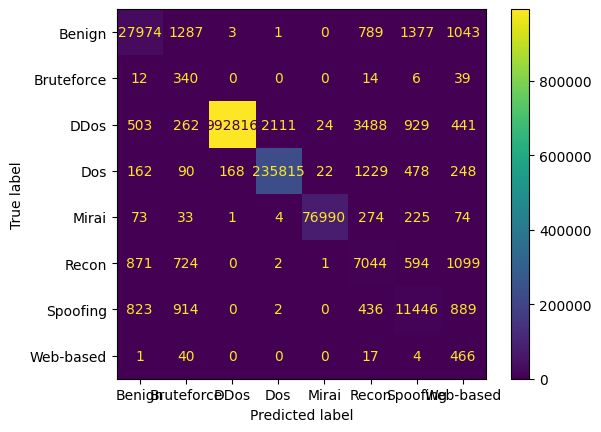

In [96]:
RF_clf_cross_Y_pred = RF_clf.predict(X_cross)
print(classification_report(Y_cross, RF_clf_cross_Y_pred))
# ConfusionMatrixDisplay.from_predictions(Y_cross, RF_clf_cross_Y_pred, normalize='true',values_format='.2f', xticks_rotation='vertical')

              precision    recall  f1-score   support

      Benign       0.79      0.62      0.70     32474
  Bruteforce       0.03      0.52      0.05       411
        DDos       0.95      0.65      0.77   1000574
         Dos       0.37      0.85      0.52    238212
       Mirai       1.00      0.99      0.99     77674
       Recon       0.47      0.47      0.47     10335
    Spoofing       0.49      0.52      0.51     14510
   Web-based       0.03      0.67      0.06       528

    accuracy                           0.70   1374718
   macro avg       0.52      0.66      0.51   1374718
weighted avg       0.84      0.70      0.73   1374718



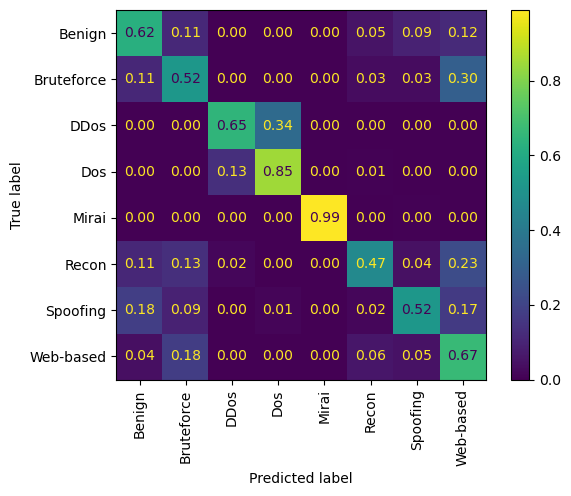

In [19]:
SVM_clf_cross_Y_pred = SVM_clf.predict(X_cross)
print(classification_report(Y_cross, SVM_clf_cross_Y_pred))
ConfusionMatrixDisplay.from_predictions(Y_cross, SVM_clf_cross_Y_pred, normalize='true',values_format='.2f', xticks_rotation='vertical')

              precision    recall  f1-score   support

      Benign       0.74      0.44      0.55     32474
  Bruteforce       0.01      0.30      0.03       411
        DDos       0.92      0.51      0.65   1000574
         Dos       0.30      0.70      0.42    238212
       Mirai       0.99      0.90      0.94     77674
       Recon       0.04      0.43      0.08     10335
    Spoofing       0.10      0.31      0.16     14510
   Web-based       0.02      0.46      0.03       528

    accuracy                           0.56   1374718
   macro avg       0.39      0.51      0.36   1374718
weighted avg       0.79      0.56      0.62   1374718



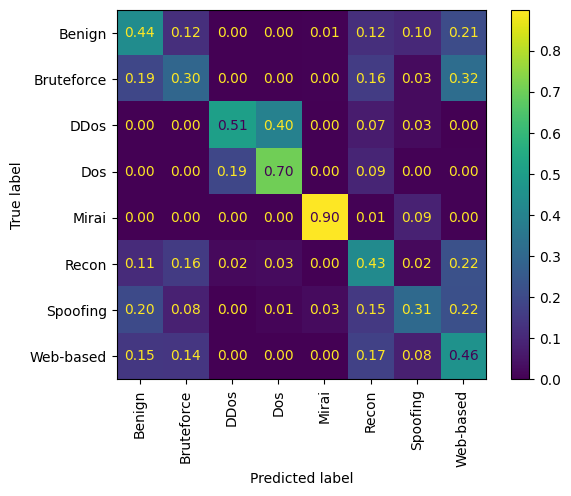

In [17]:
ADAboost_clf_Y_pred = ADAboost_clf.predict(X_cross)
print(classification_report(Y_cross, ADAboost_clf_Y_pred))
ConfusionMatrixDisplay.from_predictions(Y_cross, ADAboost_clf_Y_pred, normalize='true',values_format='.2f', xticks_rotation='vertical')